In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
for col in df.select_dtypes(include=['object', 'category']):
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


### explanation
Looking at the columns MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies they all have No phone/internet service. which means they do not have respective services and we can convert it to No

In [27]:
df["MultipleLines"] = df["MultipleLines"].replace('No phone service', 'No')
df["OnlineSecurity"] = df["OnlineSecurity"].replace('No internet service', 'No')
df["OnlineBackup"] = df["OnlineBackup"].replace('No internet service', 'No')
df["DeviceProtection"] = df["DeviceProtection"].replace('No internet service', 'No')
df["TechSupport"] = df["TechSupport"].replace('No internet service', 'No')
df["StreamingTV"] = df["StreamingTV"].replace('No internet service', 'No')
df["StreamingMovies"] = df["StreamingMovies"].replace('No internet service', 'No')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Null values

Only TotaCharges column has null values

In [29]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Handling null values
all the rows with null values have tenure as 0. i am assuming that they just started out and haven't made any payments. so we can fill this null values with 0

In [30]:
# Because all empty TotalCharges has 0 tenure(new customers)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [31]:
# Label encode churn column

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

## EDA

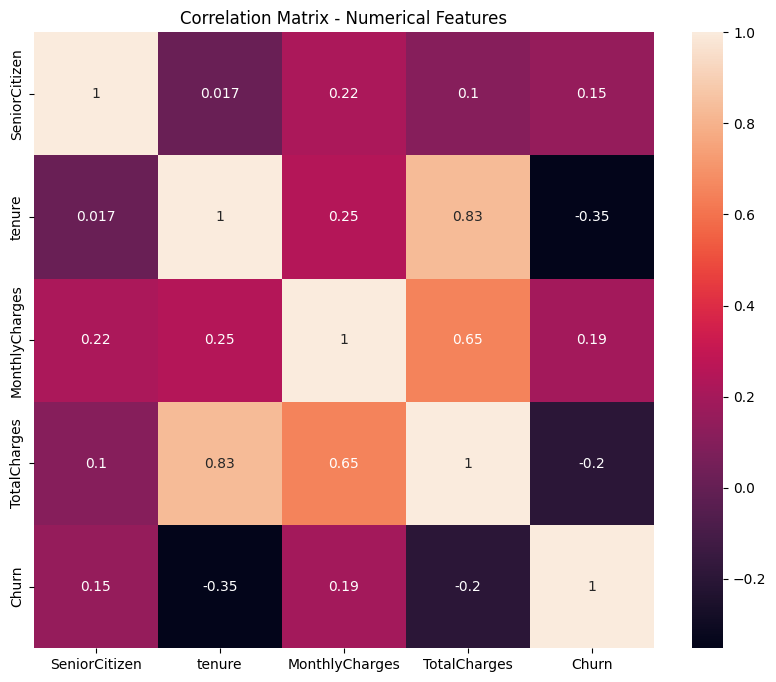

In [32]:
corr_mat = df.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix - Numerical Features')
plt.show()

Text(0.5, 1.0, 'Distribution of Monthly Charges')

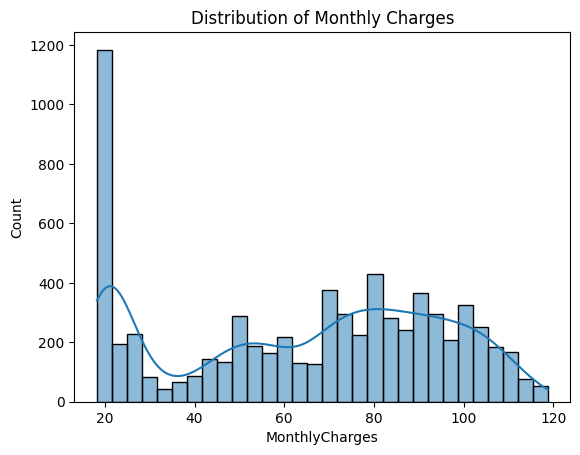

In [33]:
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True)
plt.title('Distribution of Monthly Charges')

### the data is not well distributed, need scaling

Text(0.5, 1.0, 'Monthly Charges Distribution by Churn')

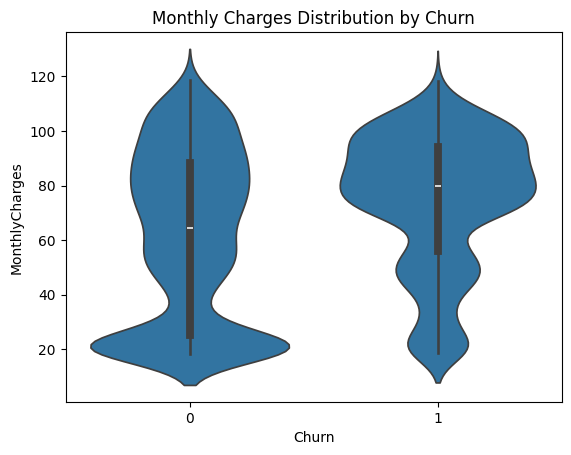

In [34]:
sns.violinplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn')

### Customers with higher monthly payments are more likely to leave than customer with low monthly payments

Text(0.5, 1.0, 'Churn Count')

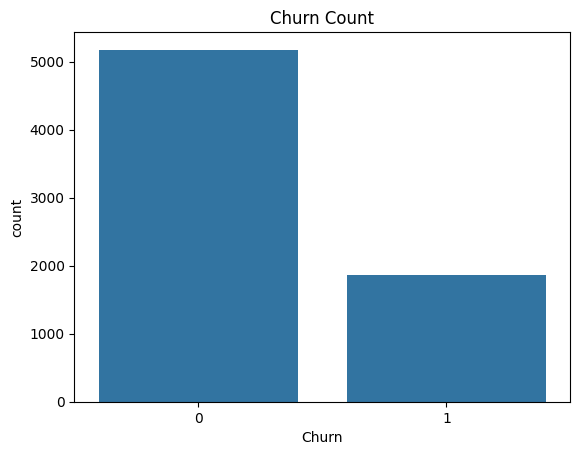

In [35]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Count')

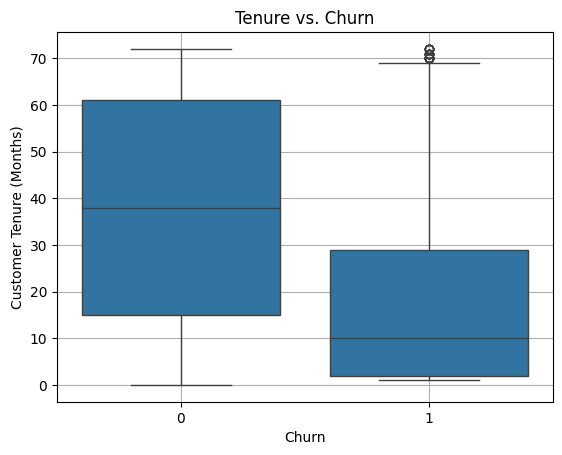

In [36]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Tenure (Months)')
plt.grid(True)
plt.show()

### new users have higher churn rate

## Data Processing

In [37]:
df = df.drop(["customerID"],axis=1)

### Label Encode and one hot encode relevant columns

In [38]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [39]:
one_hot_encode = ['InternetService', 'Contract']
df = pd.get_dummies(df, columns=one_hot_encode, drop_first=True)

le = LabelEncoder()
for col in cat_cols:
    if col not in one_hot_encode:
        df[col] = le.fit_transform(df[col])

bool_cols = df.select_dtypes('bool').columns
df[bool_cols] =df[bool_cols].astype(int)
df=pd.DataFrame(df)

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,0,1,2,29.85,29.85,0,0,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,3,56.95,1889.50,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,0,1,3,53.85,108.15,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,0,0,42.30,1840.75,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,2,70.70,151.65,1,1,0,0,0


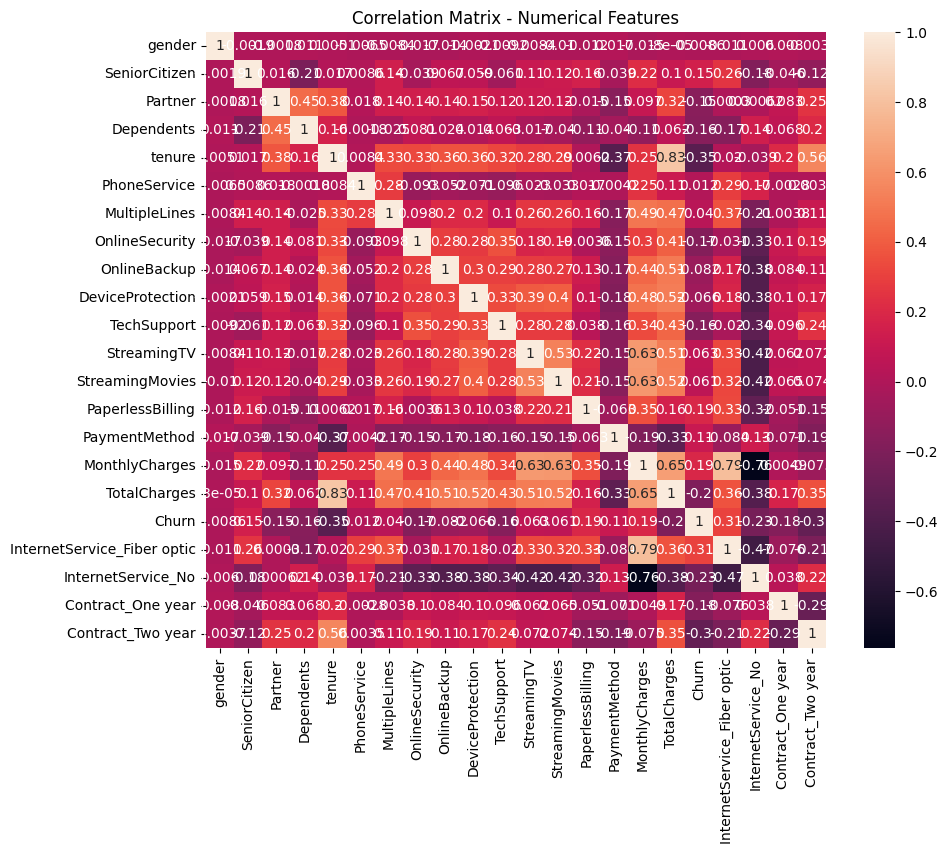

In [41]:
corr_mat = df.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix - Numerical Features')
plt.show()

In [42]:
X = df.drop(["Churn"],axis=1)
y = df.Churn
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,2,29.85,29.85,0,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0,3,56.95,1889.50,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,1,3,53.85,108.15,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,0,0,0,42.30,1840.75,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,2,70.70,151.65,1,0,0,0


### scaling each column

In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(7043, 21))

### splitting data into 80% train and 20% test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model

In [45]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(scale_pos_weight = 2.5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.7395
Random Forest: 0.7864
XGBoost: 0.7672


In [46]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

[[746 289]
 [ 78 296]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[932 103]
 [198 176]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

[[826 209]
 [119 255]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weigh

## Conclusion

in this dataset handling false negatives (mispredicting customers who leaves the service) than handling false postitive(mispredicting customers who doesn't leave the service). thats why we need to focus more on recall. 

Based on the above results, **Logistic regression** performs the best out compare to more complex models Random Forest and XGBoost